In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from larcv import larcv
%matplotlib inline

In [41]:
filename = '/Users/mdeltutt/Downloads/out_sbnd_3d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i1000.h5.pkl'
df_3d = pd.read_pickle(filename)

filename = '/Users/mdeltutt/Downloads/out_sbnd_2d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i600.h5.pkl'
df_2d = pd.read_pickle(filename)

In [42]:
df_3d.head()

,pot,nu_e,nu_vtx_x,nu_vtx_y,nu_vtx_z,n_voxels,true_neutrinoid,pred_neutrinoid,pred_nue,pred_numu,...,lep_costheta,lep_dep_e,em_dep_e,tot_dep_e,lead_prot_p,lead_prot_costheta,lead_cpi_p,lead_cpi_costheta,lead_npi_p,lead_npi_costheta
0,1.830000e+14,-9999.0,831.0,363.0,1423.0,545.0,1.0,1.0,0.005957,0.988524,...,0.803646,505.436119,17.3315,791.870105,405.770966,0.491926,-9999.000000,-9999.000000,-9999.0,-9999.0
1,1.830000e+14,-9999.0,535.0,176.0,963.0,1283.0,1.0,1.0,0.002177,0.982251,...,0.769864,1278.085149,0.0000,1952.514509,689.451343,0.760534,-9999.000000,-9999.000000,-9999.0,-9999.0
2,1.990000e+16,-9999.0,1223.0,222.0,1335.0,3290.0,0.0,0.0,0.998984,0.000665,...,0.811294,2907.087406,0.0000,3990.002371,937.749214,0.480438,-9999.000000,-9999.000000,-9999.0,-9999.0
3,1.990000e+16,-9999.0,1255.0,810.0,536.0,2439.0,0.0,0.0,0.999033,0.000674,...,0.778066,2018.981809,0.0000,2767.462610,787.092147,0.689583,183.316409,-0.792968,-9999.0,-9999.0
4,1.830000e+14,-9999.0,362.0,108.0,1154.0,772.0,1.0,1.0,0.014256,0.974537,...,0.989939,1060.951449,0.0000,1370.499906,452.336364,-0.768907,-9999.000000,-9999.000000,-9999.0,-9999.0


In [43]:
df_2d.head()

,pot,nu_e,n_voxels,true_neutrinoid,pred_neutrinoid,pred_nue,pred_numu,pred_nc,true_prot,pred_prot,...,lep_costheta,lep_dep_e,em_dep_e,tot_dep_e,lead_prot_p,lead_prot_costheta,lead_cpi_p,lead_cpi_costheta,lead_npi_p,lead_npi_costheta
0,1.830000e+14,-9999.0,8731.0,1.0,1.0,0.004591,0.988490,0.006919,1.0,1.0,...,0.650287,286.194857,290.160436,2952.847233,985.064166,0.830034,-9999.0,-9999.0,-9999.0,-9999.0
1,1.990000e+16,-9999.0,5956.0,0.0,0.0,0.999393,0.000499,0.000108,0.0,1.0,...,0.898477,742.207281,46.333583,3051.898081,659.521662,0.347313,-9999.0,-9999.0,-9999.0,-9999.0
2,1.990000e+16,-9999.0,7519.0,0.0,0.0,0.987032,0.005944,0.007024,1.0,1.0,...,0.815207,553.806667,0.000000,1932.101359,421.015546,0.611066,-9999.0,-9999.0,-9999.0,-9999.0
3,1.830000e+14,-9999.0,874.0,1.0,0.0,0.333333,0.333333,0.333333,1.0,0.0,...,0.954830,139.284296,0.000000,554.951851,296.006360,0.517914,-9999.0,-9999.0,-9999.0,-9999.0
4,5.190000e+14,-9999.0,210.0,2.0,2.0,0.051884,0.055841,0.892274,1.0,1.0,...,-9999.000000,-9999.000000,0.000000,297.579062,442.820449,0.678349,-9999.0,-9999.0,-9999.0,-9999.0


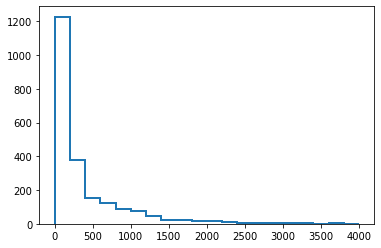

In [40]:
bins, edges, _ = plt.hist(df_3d.query('true_neutrinoid == 2')['n_voxels'].values, histtype='step', lw=2, 
                               bins=20, range=[0,4000])

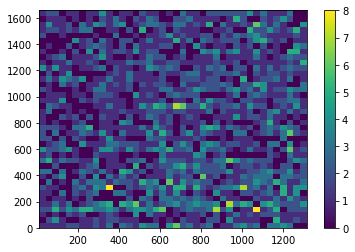

In [53]:
plt.hist2d(df_3d.query('true_neutrinoid == 0')['nu_vtx_x'].values, 
           df_3d.query('true_neutrinoid == 0')['nu_vtx_z'].values,
          bins=[40,40])

plt.colorbar()
plt.show()

In [131]:
import scipy.stats

def pot_scale_factor(this_pot, target = 1e20):
    
    return target / this_pot

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

def efficiency(num, den, num_w=None, den_w=None, n_bins=10, limits=None, conf_level=None):
    '''
    Calculates the efficiency given two populations: one containig 
    the totatility of the events, and one containing only events 
    that pass the selection.
    It uses a frequentist approach to evaluate the uncertainty.
    Other methods are to be implemented.
    
    Arguments:
        num {tuple} -- The totality of the events
        den {tuple} -- The events that pass the selection
        num_w {tuple} -- Optional, the weight for every event
        den_w {tuple} -- Optional, the weight for every selected event
        n_bins {int} -- Optional, the number of bins
        limits {tuple} -- Optional, the lower and upper limits of the bins 
        conf_level {float} -- Optional, the confidence level to be used
        
    Outputs:
        eff {tuple} -- The efficiency per bin
        unc_low {tuple} -- The lower uncertainty per bin
        unc_up {tuple} -- The upper uncertainty per bin
        bins {tuple} -- The bin edges
        bins_mid {tuple} -- The mid points of the bins
        x_bar {tuple} -- The uncertainty along the x axis
    '''
    
    if num_w is None:
        num_w = [1.] * len(num)
        
    if den_w is None:
        den_w = [1.] * len(den)
        
    if conf_level is None:
        conf_level = 0.682689492137
        
    if limits is None:
        x_min=0
        x_max=10
    else:
        x_min=limits[0]
        x_max=limits[1]

    num = np.asarray(num, dtype=np.float32)
    num_w = np.asarray(num_w, dtype=np.float32)
    den = np.asarray(den, dtype=np.float32)
    den_w = np.asarray(den_w, dtype=np.float32)

    bins = np.linspace(x_min, x_max, n_bins)

    num_h, _    = np.histogram(num, bins=bins)
    num_w_h, _  = np.histogram(num, weights=num_w, bins=bins)
    num_w2_h, _ = np.histogram(num, weights=num_w**2, bins=bins)

    den_h, _    = np.histogram(den, bins=bins)
    den_w_h, _  = np.histogram(den, weights=den_w, bins=bins)
    den_w2_h, _ = np.histogram(den, weights=den_w**2, bins=bins)

    eff = num_w_h / den_w_h

    variance = (num_w2_h * (1. - 2 * eff) + den_w2_h * eff *eff ) / ( den_w_h * den_w_h)
    sigma = np.sqrt(variance)
    prob = 0.5 * (1. - conf_level)
    delta = - scipy.stats.norm.ppf(prob) * sigma

    unc_up = []
    unc_low = []

    for eff_i, delta_i in zip(eff, delta):
        if eff_i - delta_i < 0:
            unc_low.append(eff_i)
        else:
            unc_low.append(delta_i)
            
        if eff_i + delta_i > 1:
            unc_up.append(1. - eff_i)
        else:
            unc_up.append(delta_i)
            
            
    bins_mid = [bins[i]+(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]
    x_bar = 0.5*(bins[-1]-bins[0])/len(bins)
    
    return eff, unc_low, unc_up, bins, bins_mid, x_bar


def plot_histogram(ax, data, option='simple', weights=None, n_bins=10, limits=None, label=None):
    '''
    Plots a histogram given values.
    
    Arguments:
        ax {ax} -- The axes to use for plotting
        data {tuple} -- The data to be histogrammed
        option {str} -- Optional, the option for plotting
        weights {tuple} -- Optional, The weights
        n_bins {int} -- Optional, the number of bins
        limits {tuple} -- Optional, the lower and upper limits of the bins
        label {tuple} -- Optional, the labels
        
    Options:
        simple -- With filled error bars
        stacked -- Stacked histograms
    '''
    
    data_h, err, bins, bins_mid = histogram_helper(data, weights, n_bins, limits)
    
    widths = bins[1:] - bins[:-1]

    loopable_data_h = []
    loopable_err = []
    if isinstance(data_h[0], list) or isinstance(data_h[0], np.ndarray):
        loopable_data_h = data_h
        loopable_err = err
    else:
        loopable_data_h.append(data_h)
        loopable_err.append(err)
        
    if label is None:
        label = ['empty'] * len(data)
    else:
        if len(label) != len(data):
            raise ('Length of data and label has to be the same.')
        
    lower = np.zeros(len(loopable_data_h[0]))
        
    for d, e, l in zip(loopable_data_h, loopable_err, label):
                
        d = np.append(d, d[-1])
        e = np.append(e, e[-1])
        
        if option == 'simple':
            ax.step(
                bins,
                d,
#             color="C" + str(i),
                where="post",
                label=l,
            )
            ax.fill_between(
                bins, d - e, d + e, alpha=0.3, step="post", 
#             color="C" + str(i)
            )
    
    
        elif option == 'stacked':
            ax.bar(bins_mid,
                    d[:-1],
                    lw=2,
                    width=widths,
                    bottom=lower,
                    label=l)
            lower += d[:-1]
        else:
            raise('Option' + option + 'not recognized.')

    # Uncertainty bars for stacked histograms
    if option == 'stacked':
        
        # Unify all the data, together with their weights
        if isinstance(data[0], list) or isinstance(data_h[0], np.ndarray):            
            d = data[0]
            w = weights[0]
            for i in range(1, len(data)):
                d = np.append(d, data[i])
                w = np.append(w, weights[i])
        else:
            d = data
            w = weights
        
        # Make a histogram of the total data
        data_tot, err_tot, _, _ = histogram_helper(d, w, n_bins, limits)
        
        # Plot the histogram as a hashed histogram
        for m, v, e, w in zip(bins_mid, data_tot, err_tot, widths):
            ax.add_patch(
                    patches.Rectangle(
                    (m - w / 2, v - e),
                    w,
                    2 * e,
                    hatch="\\\\\\\\\\",
                    Fill=False,
                    linewidth=0,
                    alpha=0.4,
                )
            )
    return
    
    
def histogram_helper(data, weights=None, n_bins=10, limits=None):
    '''
    Makes a histogram of values.
    
    Arguments:
        data {tuple} -- The data to be histogrammed
        weights {tuple} -- Optional, The weights
        n_bins {int} -- Optional, the number of bins
        limits {tuple} -- Optional, the lower and upper range of the bins 
        
    Outputs:
        data_h {tuple} -- The bin content per bin
        err {tuple} -- The statistical uncertainty per bin
        bins {tuple} -- The bin edges
        bins_mid {tuple} -- The mid points of the bins
    '''
    
    if limits is None:
        x_min=0
        x_max=10
    else:
        x_min=limits[0]
        x_max=limits[1]
        
#     if weights != 0 and len(data) != len(weights):
#         raise ('Data and weights must have the same length.')
        
    bins = np.linspace(x_min, x_max, n_bins+1)
    bins_mid = [bins[i]+(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]
        
    loopable_data = []
    loopable_weights = []
    if isinstance(data, list):
        loopable_data = data
        loopable_weights = weights
    else:
        loopable_data.append(data)
        loopable_weights.append(weights)
    
    data_h = []
    err = []
    
    for d, w in zip(loopable_data, loopable_weights):
        
        d = np.asarray(d, dtype=np.float32)
        w = np.asarray(w, dtype=np.float32)
    
        if w is None:
            h, _ = np.histogram(d, bins=bins)
            e    = np.sqrt(h)
        else:
            h, _    = np.histogram(d, weights=w, bins=bins)
            w2_h, _ = np.histogram(d, weights=w**2, bins=bins)
            e = np.sqrt(w2_h)
            
        data_h.append(h)
        err.append(e)
        
    if isinstance(data, list):
        return data_h, err, bins, bins_mid
    else:
        return data_h[0], err[0], bins, bins_mid
    
    
# fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9, 8))

# plot_histogram(ax, nue_df_3d[variable].values, 
#                weights=[pot_scale_3d]*len(nue_df_3d), 
#                n_bins=20, limits=x_range)

# plot_histogram(ax, nue_sel_df_3d[variable].values, 
#                weights=[pot_scale_3d]*len(nue_sel_df_3d), 
#                n_bins=20, limits=x_range)

# ax.set_xlim(x_range)
# plot_histogram(ax, [nue_df_3d[variable].values,nue_sel_df_3d[variable].values], 
#                weights=[[pot_scale_3d]*len(nue_df_3d), [pot_scale_3d]*len(nue_sel_df_3d)], 
#                n_bins=20, limits=x_range, option='stacked')

In [127]:
name = 'neutrinoid'

signal = 0 # nue, prot0, cpi = 0, npi = 0

nue_df_3d = df_3d.query('true_'+name+' == 0')
nue_sel_df_3d = df_3d.query('true_'+name+' == 0 and pred_'+name+' == 0')

numu_df_3d = df_3d.query('true_'+name+' == 1')
numu_sel_df_3d = df_3d.query('true_'+name+' == 1 and pred_'+name+' == 0')

nc_df_3d = df_3d.query('true_'+name+' == 2')
nc_sel_df_3d = df_3d.query('true_'+name+' == 2 and pred_'+name+' == 0')

nue_df_2d = df_2d.query('true_'+name+' == 0')
nue_sel_df_2d = df_2d.query('true_'+name+' == 0 and pred_'+name+' == 0')

numu_df_2d = df_2d.query('true_'+name+' == 1')
numu_sel_df_2d = df_2d.query('true_'+name+' == 1 and pred_'+name+' == 0')

nc_df_2d = df_2d.query('true_'+name+' == 2')
nc_sel_df_2d = df_2d.query('true_'+name+' == 2 and pred_'+name+' == 0')

In [117]:
# POT Scaling Factors
pot_scale_nue_3d  = pot_scale_factor(this_pot=np.sum(nue_df_3d['pot']))
pot_scale_numu_3d = pot_scale_factor(this_pot=np.sum(numu_df_3d['pot']))
pot_scale_nc_3d   = pot_scale_factor(this_pot=np.sum(nc_df_3d['pot']))
pot_scale_nue_2d  = pot_scale_factor(this_pot=np.sum(nue_df_2d['pot']))
pot_scale_numu_2d = pot_scale_factor(this_pot=np.sum(numu_df_2d['pot']))
pot_scale_nc_2d   = pot_scale_factor(this_pot=np.sum(nc_df_2d['pot']))

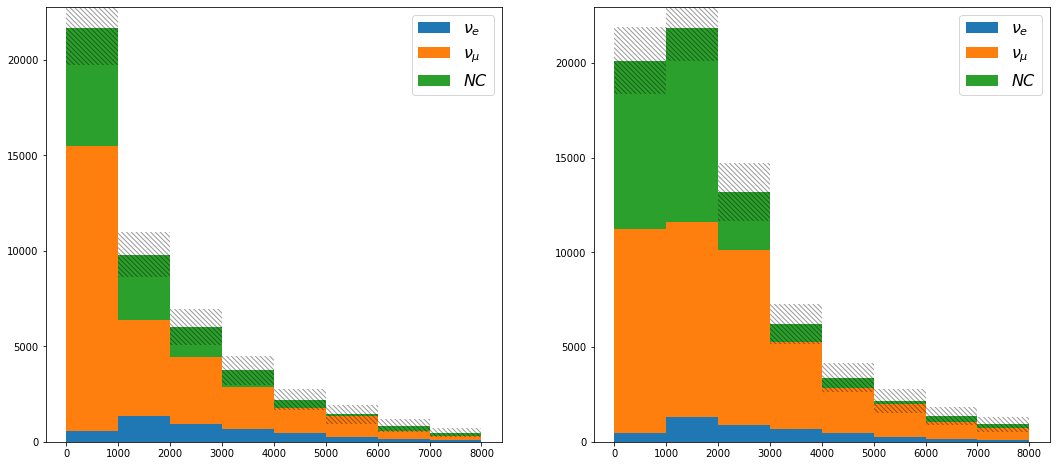

In [118]:
variable = 'lep_e'
xlabel='Lepton Energy [MeV]'
x_range = [0, 8000]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))

# plot_histogram(ax[0], [nue_sel_df_3d['lep_dep_e'].values, numu_sel_df_3d['em_dep_e'].values, nc_sel_df_3d['em_dep_e'].values],
#                weights=[[pot_scale_nue_3d]*len(nue_sel_df_3d), [pot_scale_numu_3d]*len(numu_sel_df_3d), [pot_scale_nc_3d]*len(nc_sel_df_3d)], 
#                n_bins=20, limits=x_range, option='stacked')

plot_histogram(ax[0], [nue_sel_df_3d['tot_dep_e'].values, numu_sel_df_3d['tot_dep_e'].values, nc_sel_df_3d['tot_dep_e'].values],
               weights=[[pot_scale_nue_3d]*len(nue_sel_df_3d), [pot_scale_numu_3d]*len(numu_sel_df_3d), [pot_scale_nc_3d]*len(nc_sel_df_3d)], 
               n_bins=8, limits=x_range, option='stacked',
               label=['$\\nu_e$', '$\\nu_\\mu$', '$NC$'])

# plot_histogram(ax[1], nue_sel_df_3d[variable].values,
#                weights=[pot_scale_nue_3d]*len(nue_sel_df_3d), 
#                n_bins=20, limits=x_range)

plot_histogram(ax[1], [nue_sel_df_2d['tot_dep_e'].values, numu_sel_df_2d['tot_dep_e'].values, nc_sel_df_2d['tot_dep_e'].values],
               weights=[[pot_scale_nue_2d]*len(nue_sel_df_2d), [pot_scale_numu_2d]*len(numu_sel_df_2d), [pot_scale_nc_2d]*len(nc_sel_df_2d)], 
               n_bins=8, limits=x_range, option='stacked',
               label=['$\\nu_e$', '$\\nu_\\mu$', '$NC$'])

ax[0].legend(fontsize=16, loc='best')
ax[1].legend(fontsize=16, loc='best')

In [12]:
name = 'neutrinoid'
# name = 'prot'
# name = 'cpi'
# name = 'npi'

# signal = 0 # nue, prot0, cpi = 0, npi = 0
signal = 1 # numu, prot1, cpi > 0, npi > 0
# signal = 2 # nc, prot2

if name == 'neutrinoid':
    if signal == 0: signal_txt = '$\\nu_{e}$'
    if signal == 1: signal_txt = '$\\nu_{\\mu}$'
    if signal == 2: signal_txt = '$NC$'

if name == 'prot':
    if signal == 0: signal_txt = '$N_{p} = 0$'
    if signal == 1: signal_txt = '$N_{p} = 1$'
    if signal == 2: signal_txt = '$N_{p} > 1$'
        
if name == 'cpi':
    if signal == 0: signal_txt = '$N_{\\pi^{\\pm}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{\\pm}} > 0$'

if name == 'npi':
    if signal == 0: signal_txt = '$N_{\\pi^{0}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{0}} > 0$'


nue_df_3d = df_3d.query('true_'+name+' == ' + str(signal))
nue_sel_df_3d = df_3d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

nue_df_2d = df_2d.query('true_'+name+' == ' + str(signal))
nue_sel_df_2d = df_2d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

Overall efficiency - 3D: 0.864897466827503
Overall efficiency - 2D: 0.8230800160836349


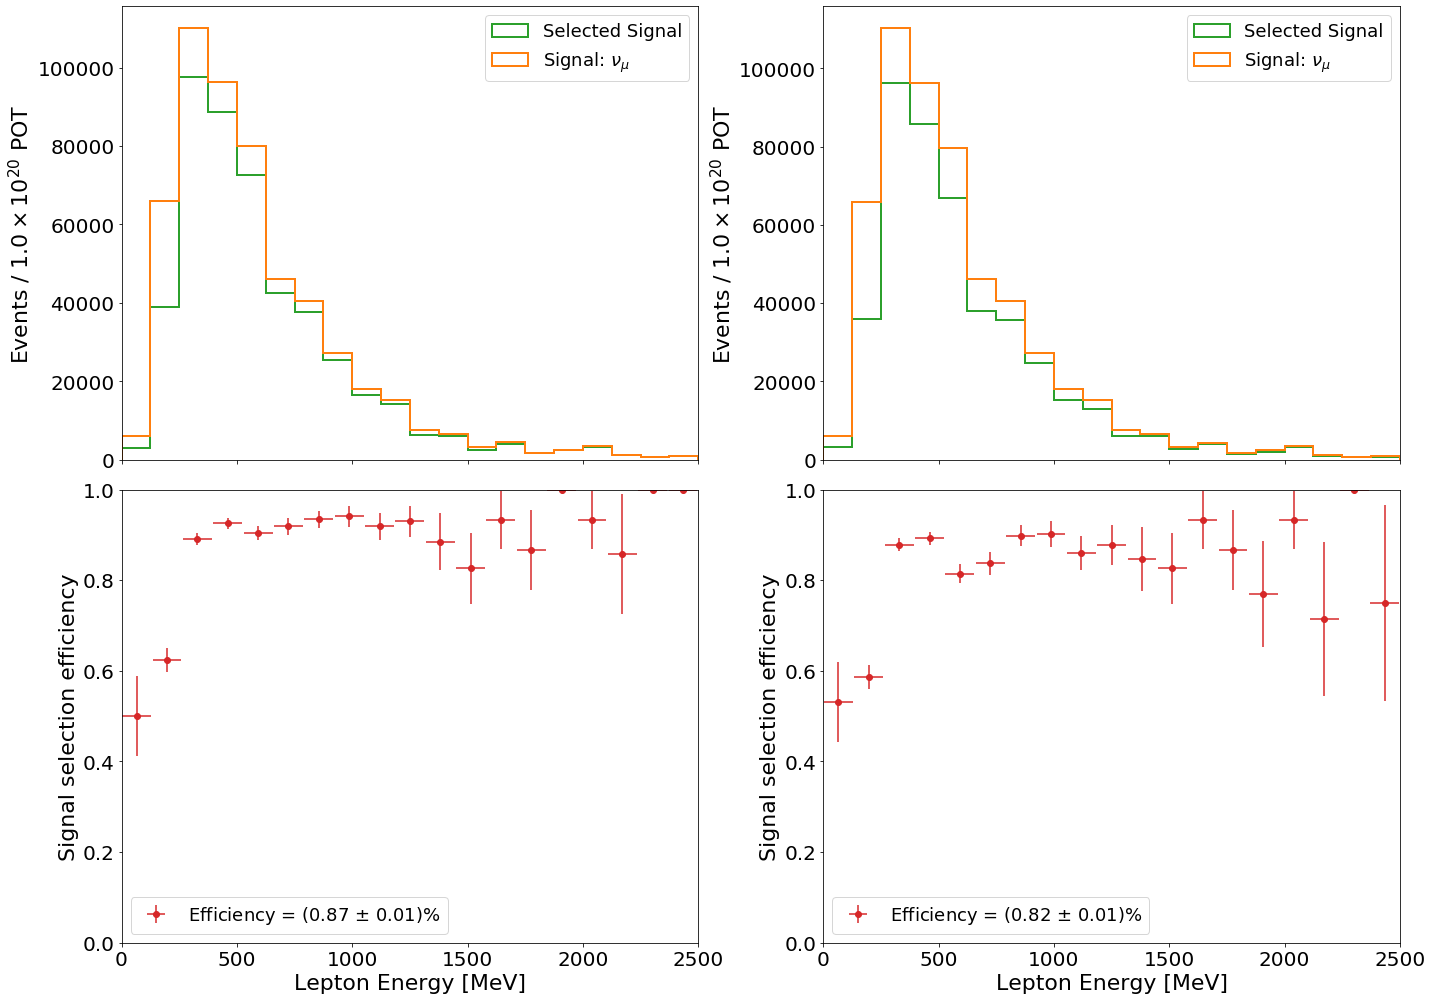

In [13]:
variable = 'lep_e'
xlabel='Lepton Energy [MeV]'
x_range = [0, 2500]

# variable = 'lep_costheta'
# xlabel='cos($\\theta_{lep}$)'
# x_range = [-1, 1]

# variable = 'lead_prot_p'
# xlabel='Leading Proton Momentum [MeV]'
# x_range = [0, 2000]

# variable = 'lead_prot_costheta'
# xlabel='Leading Proton cos($\\theta_p$)'
# x_range = [-1, 1]

# variable = 'lead_cpi_p'
# xlabel='Leading $\\pi^{\\pm}$ Momentum [MeV]'
# x_range = [0, 1500]

# variable = 'lead_cpi_costheta'
# xlabel='Leading Proton $\\pi^{\\pm}$ cos($\\theta_{\\pi^{\\pm}}$)'
# x_range = [-1, 1]

# variable = 'lead_npi_p'
# xlabel='Leading $\\pi^{0}$ Momentum [MeV]'
# x_range = [0, 1]

# variable = 'lead_npi_costheta'
# xlabel='Leading Proton $\\pi^{0}$ cos($\\theta_{\\pi^{0}}$)'
# x_range = [-1, 1]

print ('Overall efficiency - 3D:', float(len(nue_sel_df_3d)) / len(nue_df_3d))
print ('Overall efficiency - 2D:', float(len(nue_sel_df_2d)) / len(nue_df_2d))

pot_scale_3d = pot_scale_factor(this_pot=np.sum(nue_df_3d['pot']))
pot_scale_2d = pot_scale_factor(this_pot=np.sum(nue_df_2d['pot']))

nue_df_3d = nue_df_3d.query(variable + ' > -9999')
nue_sel_df_3d = nue_sel_df_3d.query(variable + ' > -9999')
nue_df_2d = nue_df_2d.query(variable + ' > -9999')
nue_sel_df_2d = nue_sel_df_2d.query(variable + ' > -9999')

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=False)


# 3D - left

bins, edges, _ = ax[0][0].hist([nue_df_3d[variable].values,nue_sel_df_3d[variable].values], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_3d]*len(nue_df_3d), [pot_scale_3d]*len(nue_sel_df_3d)],
                               bins=20,
                               range=x_range)

eff_3d, unc_low_3d, unc_up_3d, bins_3d, bins_mid_3d, unc_x_3d = efficiency(num=nue_sel_df_3d[variable].values, 
                                                         den=nue_df_3d[variable].values, 
                                                         num_w=[pot_scale_3d]*len(nue_sel_df_3d), 
                                                         den_w=[pot_scale_3d]*len(nue_df_3d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_3d = float(len(nue_sel_df_3d)) / len(nue_df_3d)
tot_err_eff_3d = np.sqrt(float(len(nue_sel_df_3d))*(1-float(len(nue_sel_df_3d))/len(nue_df_3d)))/len(nue_df_3d)

ax[1][0].errorbar(bins_mid_3d, eff_3d, 
                  yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))



# 2D - right

bins, edges, _ = ax[0][1].hist([nue_df_2d[variable],nue_sel_df_2d[variable]], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_2d]*len(nue_df_2d), [pot_scale_2d]*len(nue_sel_df_2d)],
                               bins=20,
                               range=x_range)

eff_2d, unc_low_2d, unc_up_2d, bins_2d, bins_mid_2d, unc_x_2d = efficiency(num=nue_sel_df_2d[variable].values, 
                                                         den=nue_df_2d[variable].values, 
                                                         num_w=[pot_scale_2d]*len(nue_sel_df_2d), 
                                                         den_w=[pot_scale_2d]*len(nue_df_2d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_2d = float(len(nue_sel_df_2d)) / len(nue_df_2d)
tot_err_eff_2d = np.sqrt(float(len(nue_sel_df_2d))*(1-float(len(nue_sel_df_2d))/len(nue_df_2d)))/len(nue_df_2d)

ax[1][1].errorbar(bins_mid_2d, eff_2d, 
                  yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))



fsize = 22

# Left settings

ax[0][0].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][0].set_xlabel(xlabel, fontsize=fsize)
ax[1][0].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][0].tick_params(labelsize=20)
ax[1][0].tick_params(labelsize=20)

ax[0][0].legend(fontsize=18, loc='best')
ax[1][0].legend(fontsize=18, loc=3)
ax[1][0].set_ylim(0,1)
ax[1][0].set_xlim(x_range[0], x_range[1])


# Right settings

ax[0][1].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][1].set_xlabel(xlabel, fontsize=fsize)
ax[1][1].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][1].tick_params(labelsize=20)
ax[1][1].tick_params(labelsize=20)

ax[0][1].legend(fontsize=18, loc='best')
ax[1][1].legend(fontsize=18, loc=3)
ax[1][1].set_ylim(0,1)
ax[1][1].set_xlim(x_range[0], x_range[1])


fig.tight_layout()

plt.savefig('selected_events_efficiency_'+name+'_sig'+str(signal)+'_'+variable+'.pdf')
plt.show()



# Number of protons

In [54]:
name = 'neutrinoid'
# name = 'prot'
# name = 'cpi'
# name = 'npi'

# signal = 0 # nue, prot0, cpi = 0, npi = 0
signal = 1 # numu, prot1, cpi > 0, npi > 0
# signal = 2 # nc, prot2

if name == 'neutrinoid':
    if signal == 0: signal_txt = '$\\nu_{e}$'
    if signal == 1: signal_txt = '$\\nu_{\\mu}$'
    if signal == 2: signal_txt = '$NC$'

if name == 'prot':
    if signal == 0: signal_txt = '$N_{p} = 0$'
    if signal == 1: signal_txt = '$N_{p} = 1$'
    if signal == 2: signal_txt = '$N_{p} > 1$'
        
if name == 'cpi':
    if signal == 0: signal_txt = '$N_{\\pi^{\\pm}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{\\pm}} > 0$'

if name == 'npi':
    if signal == 0: signal_txt = '$N_{\\pi^{0}} = 0$'
    if signal == 1: signal_txt = '$N_{\\pi^{0}} > 0$'


nue_df_3d = df_3d.query('true_'+name+' == ' + str(signal))
nue_sel_df_3d = df_3d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

nue_df_2d = df_2d.query('true_'+name+' == ' + str(signal))
nue_sel_df_2d = df_2d.query('true_'+name+' == ' + str(signal) + ' and pred_'+name+' == ' + str(signal))

In [136]:
def make_plots(name, signal_txt, var, str_sig, str_sig_sel, df_3d, df_2d):
    
    sig_df_3d = df_3d.query(str_sig)
    sig_sel_df_3d = df_3d.query(str_sig_sel)

    sig_df_2d = df_2d.query(str_sig)
    sig_sel_df_2d = df_2d.query(str_sig_sel)

    print ('Overall efficiency - 3D:', float(len(sig_sel_df_3d)) / len(sig_df_3d))
    print ('Overall efficiency - 2D:', float(len(sig_sel_df_2d)) / len(sig_df_2d))

    pot_scale_3d = pot_scale_factor(this_pot=np.sum(sig_df_3d['pot']))
    pot_scale_2d = pot_scale_factor(this_pot=np.sum(sig_df_2d['pot']))
    
    sig_df_3d = sig_df_3d.query(var.variable + ' > -9999')
    sig_sel_df_3d = sig_sel_df_3d.query(var.variable + ' > -9999')
    sig_df_2d = sig_df_2d.query(var.variable + ' > -9999')
    sig_sel_df_2d = sig_sel_df_2d.query(var.variable + ' > -9999')


    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=False)

    # 3D - left

    bins, edges, _ = ax[0][0].hist([sig_df_3d[var.variable].values,sig_sel_df_3d[var.variable].values], histtype='step', lw=2, 
                                   color = ['#ff7f0e', '#2ca02c'], 
                                   label = ['Signal: '+signal_txt, 'Selected Signal'], 
                                   weights=[[pot_scale_3d]*len(sig_df_3d), [pot_scale_3d]*len(sig_sel_df_3d)],
                                   bins=20,
                                   range=[var.x_1, var.x_2])

    eff_3d, unc_low_3d, unc_up_3d, bins_3d, bins_mid_3d, unc_x_3d = efficiency(num=sig_sel_df_3d[var.variable].values, 
                                                             den=sig_df_3d[var.variable].values, 
                                                             num_w=[pot_scale_3d]*len(sig_sel_df_3d), 
                                                             den_w=[pot_scale_3d]*len(sig_df_3d), 
                                                             n_bins=20, 
                                                             limits=[var.x_1, var.x_2])

    tot_eff_3d = float(len(sig_sel_df_3d)) / len(sig_df_3d)
    tot_err_eff_3d = np.sqrt(float(len(sig_sel_df_3d))*(1-float(len(sig_sel_df_3d))/len(sig_df_3d)))/len(sig_df_3d)

    ax[1][0].errorbar(bins_mid_3d, eff_3d, 
                      yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                      fmt='o',
                      color='#d62728',
                      label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))



    # 2D - right

    bins, edges, _ = ax[0][1].hist([sig_df_2d[var.variable],sig_sel_df_2d[var.variable]], histtype='step', lw=2, 
                                   color = ['#ff7f0e', '#2ca02c'], 
                                   label = ['Signal: '+signal_txt, 'Selected Signal'], 
                                   weights=[[pot_scale_2d]*len(sig_df_2d), [pot_scale_2d]*len(sig_sel_df_2d)],
                                   bins=20,
                                   range=[var.x_1, var.x_2])

    eff_2d, unc_low_2d, unc_up_2d, bins_2d, bins_mid_2d, unc_x_2d = efficiency(num=sig_sel_df_2d[var.variable].values, 
                                                             den=sig_df_2d[var.variable].values, 
                                                             num_w=[pot_scale_2d]*len(sig_sel_df_2d), 
                                                             den_w=[pot_scale_2d]*len(sig_df_2d), 
                                                             n_bins=20, 
                                                             limits=[var.x_1, var.x_2])

    tot_eff_2d = float(len(sig_sel_df_2d)) / len(sig_df_2d)
    tot_err_eff_2d = np.sqrt(float(len(sig_sel_df_2d))*(1-float(len(sig_sel_df_2d))/len(sig_df_2d)))/len(sig_df_2d)

    ax[1][1].errorbar(bins_mid_2d, eff_2d, 
                      yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                      fmt='o',
                      color='#d62728',
                      label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))



    fsize = 22

    # Left settings

    ax[0][0].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
    # ax[0][0].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
    # ax[0][0].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

    ax[1][0].set_xlabel(var.xlabel, fontsize=fsize)
    ax[1][0].set_ylabel('Signal selection efficiency', fontsize=fsize)

    ax[0][0].tick_params(labelsize=20)
    ax[1][0].tick_params(labelsize=20)

    ax[0][0].legend(fontsize=18)
    ax[1][0].legend(fontsize=18, loc=3)
    ax[1][0].set_ylim(0,1)


    # Right settings

    ax[0][1].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
    # ax[0][1].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
    # ax[0][1].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

    ax[1][1].set_xlabel(var.xlabel, fontsize=fsize)
    ax[1][1].set_ylabel('Signal selection efficiency', fontsize=fsize)

    ax[0][1].tick_params(labelsize=20)
    ax[1][1].tick_params(labelsize=20)

    ax[0][1].legend(fontsize=18)
    ax[1][1].legend(fontsize=18, loc=3)
    ax[1][1].set_ylim(0,1)


    fig.tight_layout()

    plt.savefig('selected_events_efficiency_'+name+'_'+var.variable+'.pdf')
    plt.show()
    
    
    
    
    fig = plt.figure(figsize=(9,8),facecolor='w')

    plt.errorbar(bins_mid_3d, eff_3d, 
                      yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                      fmt='o',
                      label='3D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))

    plt.errorbar(bins_mid_2d, eff_2d, 
                      yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                      fmt='o',
                      label='2D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))

    plt.xlabel(var.xlabel, fontsize=fsize)
    plt.ylabel('Signal selection efficiency', fontsize=fsize)

    plt.legend(fontsize=16, loc='best')
    # plt.title('SBND Sparse Data', loc='right', fontsize=14)
    plt.tick_params(labelsize=15)
    plt.ylim(0,1)

    plt.savefig('selected_events_efficiency_both_'+name+'_'+var.variable+'.pdf')
    plt.show()

nue_cc
true_neutrinoid == 0 true_neutrinoid == 0 and pred_neutrinoid == 0
Overall efficiency - 3D: 0.9094397544128934
Overall efficiency - 2D: 0.872168905950096


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in sqrt


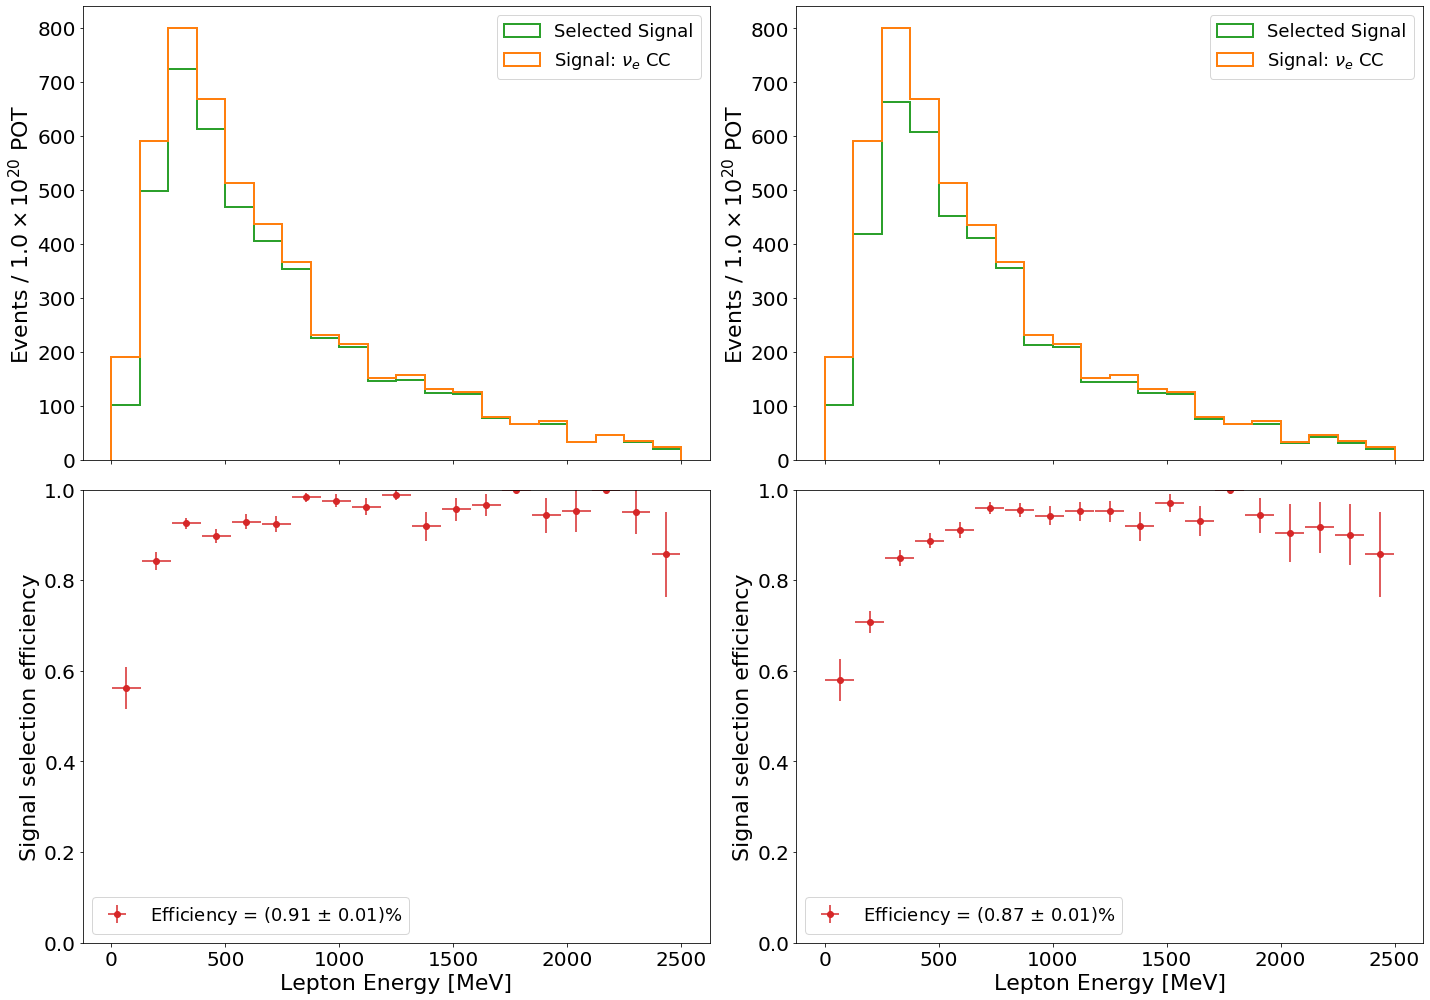

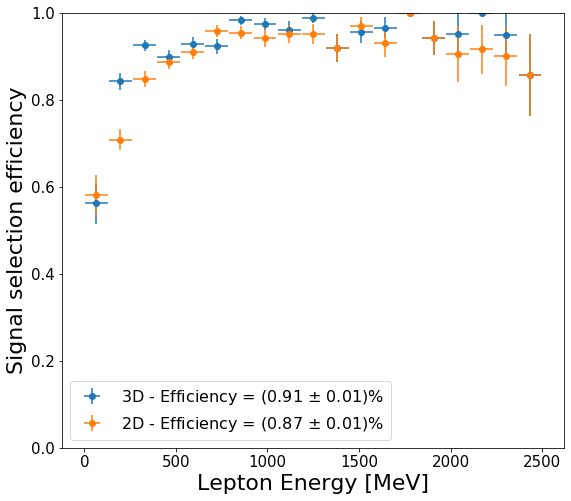

nue_cc
true_neutrinoid == 0 true_neutrinoid == 0 and pred_neutrinoid == 0
Overall efficiency - 3D: 0.9094397544128934
Overall efficiency - 2D: 0.872168905950096


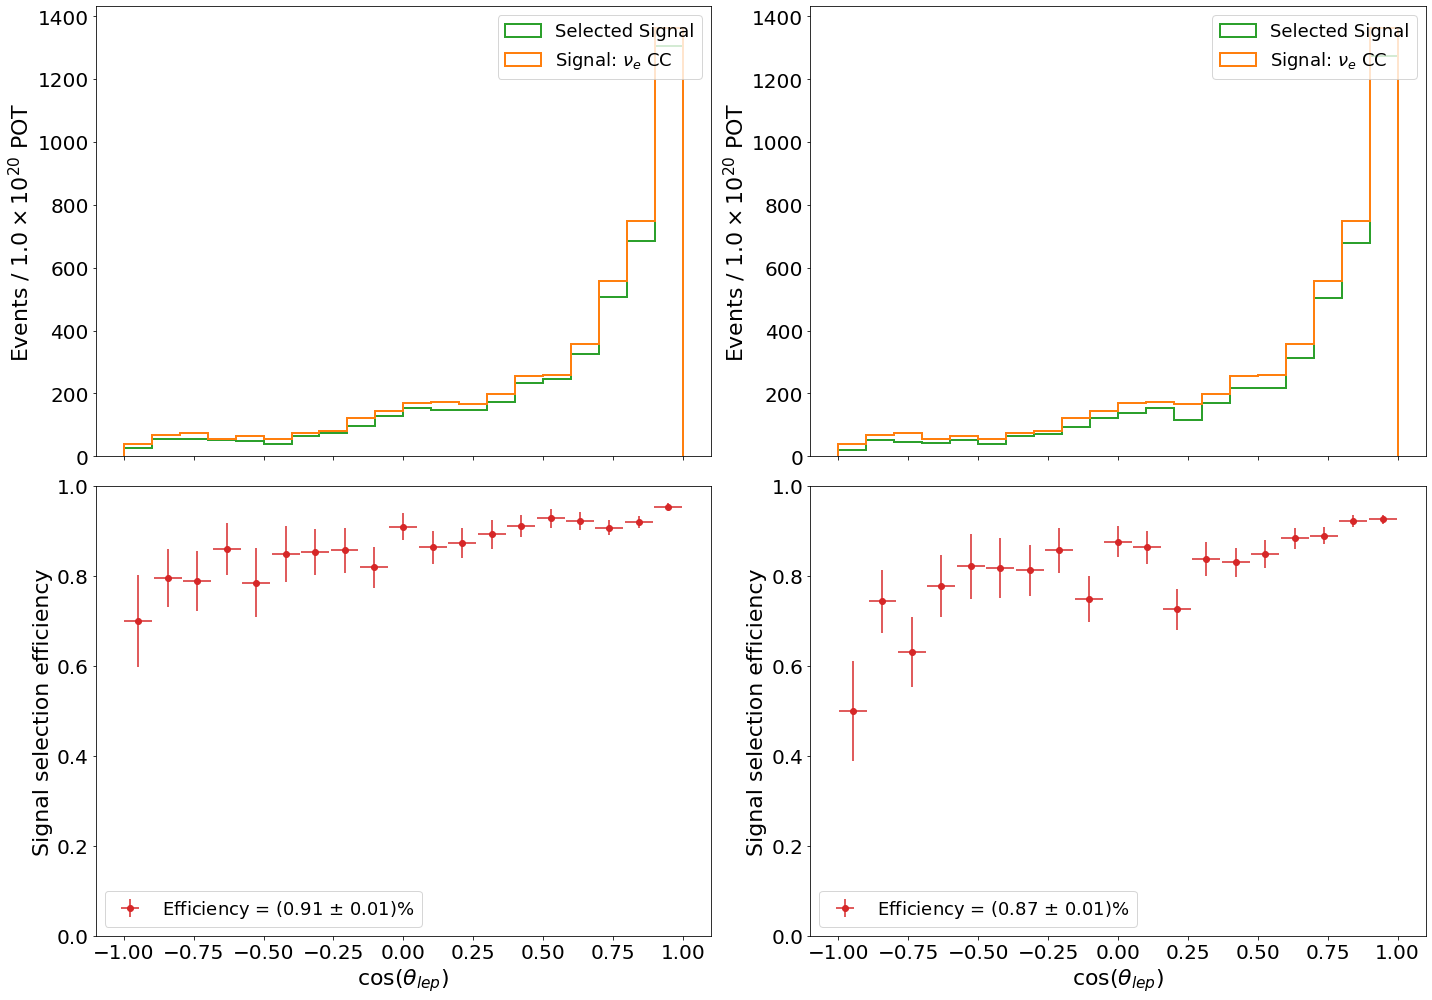

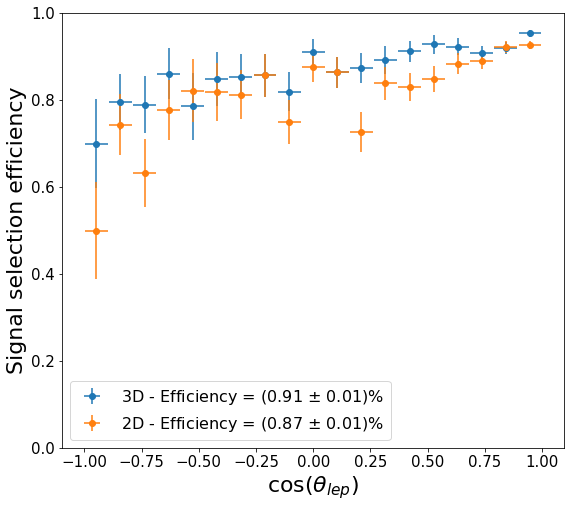

In [137]:
# https://stackoverflow.com/questions/35988/c-like-structures-in-python/31062667
from dataclasses import dataclass

@dataclass
class Variable:
    variable: str = 'lep_e'
    xlabel: str = 'Lepton Energy [MeV]'
    x_1: float = 0.0
    x_2: float = 2500.

all_vars = {
    'lep_p':               Variable(variable = 'lep_e', xlabel = 'Lepton Energy [MeV]', x_1 = 0.0, x_2 = 2500.),
    'lep_costheta':        Variable(variable = 'lep_costheta', xlabel = 'cos($\\theta_{lep}$)', x_1 = -1., x_2 = 1.),
    'lead_prot_p':         Variable(variable = 'lead_prot_p', xlabel = 'Leading Proton Momentum [MeV]', x_1 = 0., x_2 = 2000.),
    'lead_prot_costheta':  Variable(variable = 'lead_prot_costheta', xlabel = 'Leading Proton cos($\\theta_p$)', x_1 = 0., x_2 = 2000.),
}
# p = Variable(variable = 'lep_costheta', xlabel = 'cos($\\theta_{lep}$)', x_1 = -1., x_2 = 2500.)
# print (p.variable)

# sig = 0

# sig_df_3d = df_3d.query('true_neutrinoid == ' + str(signal))
# sig_sel_df_3d = df_3d.query('true_neutrinoid == ' + str(signal) + ' and pred_neutrinoid == ' + str(signal))

# sig_df_2d = df_2d.query('true_neutrinoid == ' + str(signal))
# sig_sel_df_2d = df_2d.query('true_neutrinoid == ' + str(signal) + ' and pred_neutrinoid == ' + str(signal))

# sel_str = 'true_neutrinoid == ' + str(signal)
# sel_str_sel = 'true_neutrinoid == ' + str(signal) + ' and pred_neutrinoid == ' + str(signal)





categories = [
    {
        'name'       : "nue_cc",
        'signal'     : "true_neutrinoid == 0",
        'signal_sel' : "true_neutrinoid == 0 and pred_neutrinoid == 0",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_e$ CC"
    },
    {
        'name'       : "numu_cc",
        'signal'     : "true_neutrinoid == 1",
        'signal_sel' : "true_neutrinoid == 1 and pred_neutrinoid == 1",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_{\mu}$ CC"
    },
    {
        'name'       : "nue_cc_0p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 0",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 0 and pred_neutrinoid == 0 and pred_prot == 0",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_e CC$, $N_{p} = 0$"
    },
    {
        'name'       : "nue_cc_1p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 1",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 1 and pred_neutrinoid == 0 and pred_prot == 1",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lead_prot_p'], all_vars['lead_prot_costheta']],
        'label'      : r"$\nu_e$ CC, $N_{p} = 1$"
    },
    {
        'name'       : "nue_cc_2p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 2",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 2 and pred_neutrinoid == 0 and pred_prot == 2",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lead_prot_p'], all_vars['lead_prot_costheta']],
        'label'      : r"$\nu_e$ CC, $N_{p} > 1$"
    }
]


c = categories[0]
for v in c['var']:
    print (c['name'])
    print (c['signal'], c['signal_sel'])
    
    make_plots(c['name'], c['label'], v, c['signal'], c['signal_sel'], df_3d, df_2d)
#     break
    



In [ ]:

variable = 'lep_e'
xlabel='Lepton Energy [MeV]'
x_range = [0, 2500]

# variable = 'lep_costheta'
# xlabel='cos($\\theta_{lep}$)'
# x_range = [-1, 1]

# variable = 'lead_prot_p'
# xlabel='Leading Proton Momentum [MeV]'
# x_range = [0, 2000]

# variable = 'lead_prot_costheta'
# xlabel='Leading Proton cos($\\theta_p$)'
# x_range = [-1, 1]

# variable = 'lead_cpi_p'
# xlabel='Leading $\\pi^{\\pm}$ Momentum [MeV]'
# x_range = [0, 1500]

# variable = 'lead_cpi_costheta'
# xlabel='Leading Proton $\\pi^{\\pm}$ cos($\\theta_{\\pi^{\\pm}}$)'
# x_range = [-1, 1]

# variable = 'lead_npi_p'
# xlabel='Leading $\\pi^{0}$ Momentum [MeV]'
# x_range = [0, 1]

# variable = 'lead_npi_costheta'
# xlabel='Leading Proton $\\pi^{0}$ cos($\\theta_{\\pi^{0}}$)'
# x_range = [-1, 1]

print ('Overall efficiency - 3D:', float(len(nue_sel_df_3d)) / len(nue_df_3d))
print ('Overall efficiency - 2D:', float(len(nue_sel_df_2d)) / len(nue_df_2d))

pot_scale_3d = pot_scale_factor(this_pot=np.sum(nue_df_3d['pot']))
pot_scale_2d = pot_scale_factor(this_pot=np.sum(nue_df_2d['pot']))

nue_df_3d = nue_df_3d.query(variable + ' > -9999')
nue_sel_df_3d = nue_sel_df_3d.query(variable + ' > -9999')
nue_df_2d = nue_df_2d.query(variable + ' > -9999')
nue_sel_df_2d = nue_sel_df_2d.query(variable + ' > -9999')

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=False)


# 3D - left

bins, edges, _ = ax[0][0].hist([nue_df_3d[variable].values,nue_sel_df_3d[variable].values], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_3d]*len(nue_df_3d), [pot_scale_3d]*len(nue_sel_df_3d)],
                               bins=20,
                               range=x_range)

eff_3d, unc_low_3d, unc_up_3d, bins_3d, bins_mid_3d, unc_x_3d = efficiency(num=nue_sel_df_3d[variable].values, 
                                                         den=nue_df_3d[variable].values, 
                                                         num_w=[pot_scale_3d]*len(nue_sel_df_3d), 
                                                         den_w=[pot_scale_3d]*len(nue_df_3d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_3d = float(len(nue_sel_df_3d)) / len(nue_df_3d)
tot_err_eff_3d = np.sqrt(float(len(nue_sel_df_3d))*(1-float(len(nue_sel_df_3d))/len(nue_df_3d)))/len(nue_df_3d)

ax[1][0].errorbar(bins_mid_3d, eff_3d, 
                  yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))



# 2D - right

bins, edges, _ = ax[0][1].hist([nue_df_2d[variable],nue_sel_df_2d[variable]], histtype='step', lw=2, 
                               color = ['#ff7f0e', '#2ca02c'], 
                               label = ['Signal: '+signal_txt, 'Selected Signal'], 
                               weights=[[pot_scale_2d]*len(nue_df_2d), [pot_scale_2d]*len(nue_sel_df_2d)],
                               bins=20,
                               range=x_range)

eff_2d, unc_low_2d, unc_up_2d, bins_2d, bins_mid_2d, unc_x_2d = efficiency(num=nue_sel_df_2d[variable].values, 
                                                         den=nue_df_2d[variable].values, 
                                                         num_w=[pot_scale_2d]*len(nue_sel_df_2d), 
                                                         den_w=[pot_scale_2d]*len(nue_df_2d), 
                                                         n_bins=20, 
                                                         limits=x_range)

tot_eff_2d = float(len(nue_sel_df_2d)) / len(nue_df_2d)
tot_err_eff_2d = np.sqrt(float(len(nue_sel_df_2d))*(1-float(len(nue_sel_df_2d))/len(nue_df_2d)))/len(nue_df_2d)

ax[1][1].errorbar(bins_mid_2d, eff_2d, 
                  yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                  fmt='o',
                  color='#d62728',
                  label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))



fsize = 22

# Left settings

ax[0][0].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][0].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][0].set_xlabel(xlabel, fontsize=fsize)
ax[1][0].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][0].tick_params(labelsize=20)
ax[1][0].tick_params(labelsize=20)

ax[0][0].legend(fontsize=18, loc='best')
ax[1][0].legend(fontsize=18, loc=3)
ax[1][0].set_ylim(0,1)
ax[1][0].set_xlim(x_range[0], x_range[1])


# Right settings

ax[0][1].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
# ax[0][1].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

ax[1][1].set_xlabel(xlabel, fontsize=fsize)
ax[1][1].set_ylabel('Signal selection efficiency', fontsize=fsize)

ax[0][1].tick_params(labelsize=20)
ax[1][1].tick_params(labelsize=20)

ax[0][1].legend(fontsize=18, loc='best')
ax[1][1].legend(fontsize=18, loc=3)
ax[1][1].set_ylim(0,1)
ax[1][1].set_xlim(x_range[0], x_range[1])


fig.tight_layout()

plt.savefig('selected_events_efficiency_'+name+'_sig'+str(signal)+'_'+variable+'.pdf')
plt.show()


